In [1]:
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
import numpy as np
import pickle
import scipy

from utils import utils
import utils.efinet as efinet
#from keras.utils.np_utils import to_categorical
import tensorflow as tf

        time       offset    code  type          Label StimType
0      6.960     [[6961]]  [0002]     2  [Block Start]     [[]]
1   1206.979  [[1206980]]  [0002]     2  [Block Start]     [[]]
2   1207.012  [[1207013]]  [0016]    16   [Stim Start]    [F30]
3   1242.219  [[1242220]]  [0032]    32    [Stim Stop]     [[]]
4   1357.097  [[1357098]]  [0016]    16   [Stim Start]    [F30]
5   1392.077  [[1392078]]  [0032]    32    [Stim Stop]     [[]]
6   1507.107  [[1507108]]  [0016]    16   [Stim Start]    [F30]
7   1542.182  [[1542183]]  [0032]    32    [Stim Stop]     [[]]
8   1657.105  [[1657106]]  [0016]    16   [Stim Start]    [F30]
9   1692.084  [[1692085]]  [0032]    32    [Stim Stop]     [[]]
10  1807.022  [[1807023]]  [0016]    16   [Stim Start]    [F30]
11  1842.101  [[1842102]]  [0032]    32    [Stim Stop]     [[]]
12  1957.009  [[1957010]]  [0016]    16   [Stim Start]    [F30]
13  1992.172  [[1992173]]  [0032]    32    [Stim Stop]     [[]]
14  2107.002  [[2107003]]  [0016]    16 

<StemContainer object of 3 artists>

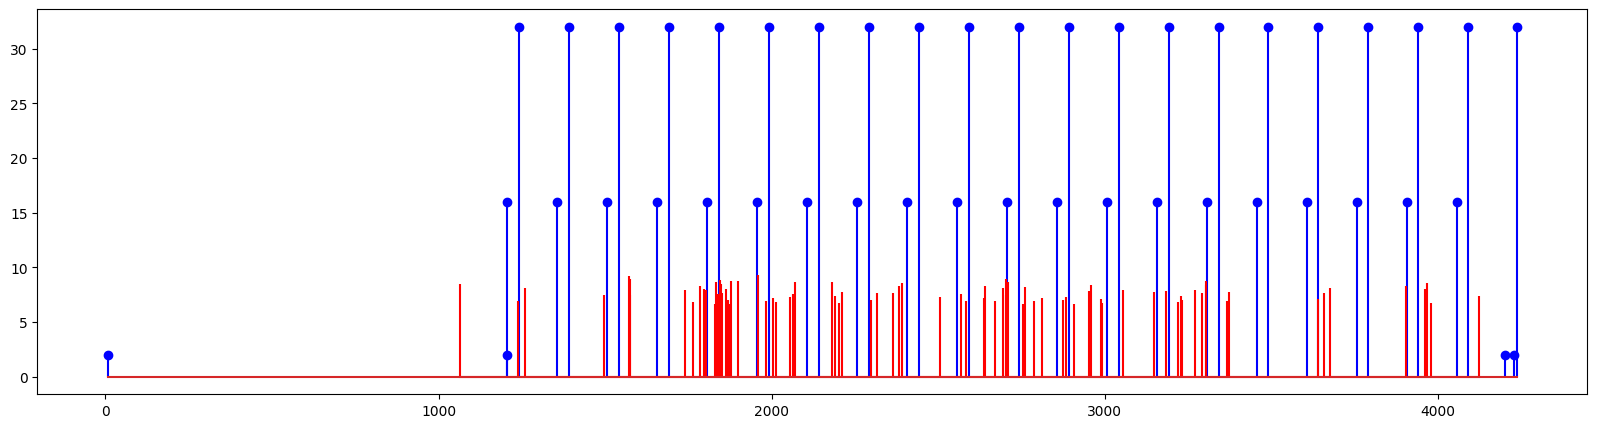

In [329]:
s = 1
i = 4

# Load and concat data
with open(f"../tests/data/TRANS/TRANS_{s}s_Exp2_labels.pkl", "rb") as f:
    labels = pickle.load(f)

with open(f"../tests/data/GADF_prepared/GADF_{s}s_Exp2_TRANS{i}.pkl", "rb") as f:
    gadf = pickle.load(f)

df = pd.DataFrame(labels[i-1])
df["time"] = df["time"].astype(str).str.replace(r"\[|\]|,", "", regex=True).astype(float)
df["type"] = df["type"].astype(str).str.replace(r"\[|\]|,", "", regex=True).astype(int)
print(df)

_, eval_model = efinet.build_graph([32, 32, 3], 2)
eval_model.load_weights(f"../results/models/WESAD_{s}s.h5")
pred = eval_model.predict(gadf)

probs = pd.DataFrame(pred[0])
probs["time"] = probs.index.astype(int) * s

plt.rcParams["figure.figsize"] = (20, 5)

filtprobs = probs[probs[1] > 0.66]
plt.stem(df["time"], df["type"], 'b')
plt.stem(filtprobs["time"], filtprobs[1]*10, 'r', markerfmt="")
# plt.hlines(0.5, 0, len(probs), "k")
# plt.hlines(5, 0, len(probs), "k")